In [48]:
#importing lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/19060/OneDrive/Desktop/DATA SCIENCE/MACHINE LEARNING/DATA SET/Logistic Regression in R/titanic_dataset.csv")

In [3]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500


In [4]:
print("number of passengers "+str(len(df)))

number of passengers 1309


## Analysing data

<AxesSubplot:xlabel='survived', ylabel='count'>

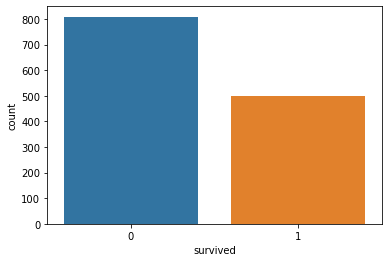

In [5]:
sns.countplot(x="survived",data=df)

In [6]:
# we can see that , approx. 800 could not survived and aprox 500 survived
# lets compare genderwise

<AxesSubplot:xlabel='survived', ylabel='count'>

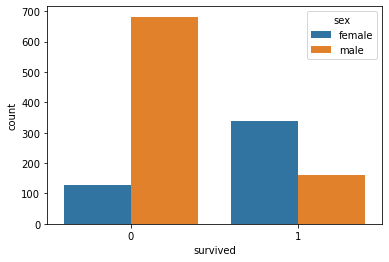

In [7]:
sns.countplot(x="survived",hue="sex",data=df)
# hue parameter determines which column in the data frame should be used for colour encoding

<AxesSubplot:xlabel='survived', ylabel='count'>

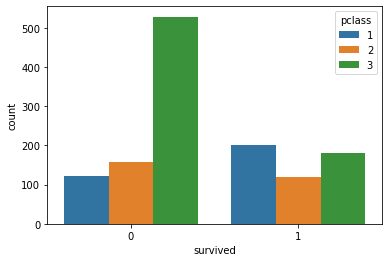

In [8]:
# lets compare some more
sns.countplot(x="survived",hue="pclass",data=df)
#here we can see that, most who could not survived were of class 3 passengers(labours)
# and most of the passengers who survived were of 1st class, it means they were given more preferrence

<AxesSubplot:ylabel='Frequency'>

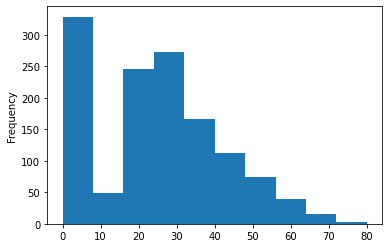

In [9]:
# now lets plot the graph on the age distribution
df["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

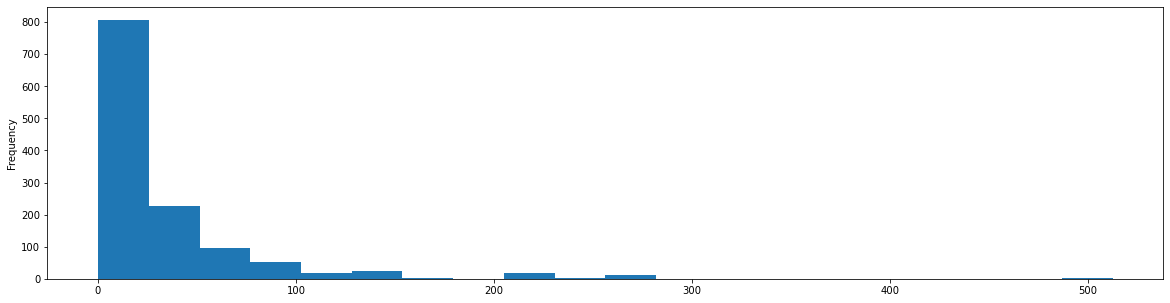

In [10]:
df["fare"].plot.hist(bins=20,figsize=(20,5))
# To construct a histogram, the first step is to “bin” the range of values — 
# that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. 
# The bins are usually specified as consecutive, non-overlapping intervals of a variable.

# figsize
# Matplotlib Figsize is a method from the pyplot class which allows you to change the dimensions of the graph.
# As every dimension in generated graphs is adjusted by the library, it can be quite difficult to visualize data 
# in a proper format.
# As a result, the figsize method is very useful to customize the dimensions as well as layouts of the graphs.

<AxesSubplot:xlabel='pclass', ylabel='age'>

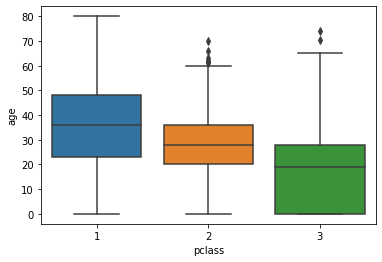

In [11]:
#lets check mostly which age group was there in which class
sns.boxplot(x="pclass",y="age",data=df)

# Data Wrangling / Data Cleaning

In [12]:
#lets rename some of the columns
df.rename(columns={"ticket":"ticket_no","fare":"price"},inplace=True)

In [13]:
df.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket_no,price
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500


In [14]:
df.isnull()

,survived,pclass,name,sex,age,sibsp,parch,ticket_no,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False


In [15]:
# lets check for null values
# isnull() gives the boolen value
# we use isnull().sum() to get prescribed value
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         5
parch         2
ticket_no     0
price        48
dtype: int64

<AxesSubplot:>

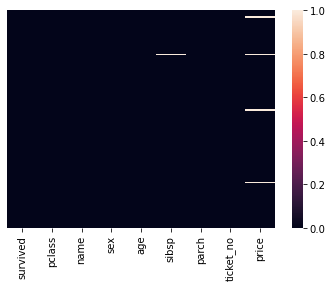

In [16]:
#lets check the null thorough heatmap
sns.heatmap(df.isnull(),yticklabels=False)
# we can see here that fare have some null values
#due to the very less null values in sbsp and parch, its not visible

In [17]:
#now lets drop the price column, as it has lots of null value
df.drop("price",axis=1,inplace=True)

In [18]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket_no
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781
...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665
1305,0,3,"Zabour, Miss. Thamine",female,0.0000,1.0,0.0,2665
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656
1307,0,3,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670


In [19]:
df.isnull().sum()

survived     0
pclass       0
name         0
sex          0
age          0
sibsp        5
parch        2
ticket_no    0
dtype: int64

In [20]:
#there are still some null values in sibsp and parch
#lets drop only the null value row  , not the whole column
df.dropna(inplace=True)

In [21]:
#here we can see that our all null values have been removed
#and the data is cleaned now
df.isnull().sum()

survived     0
pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket_no    0
dtype: int64

<AxesSubplot:>

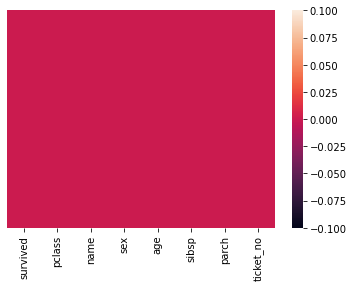

In [22]:
sns.heatmap(df.isnull(),yticklabels=False)
#we can see there is no null value present in our data now

In [23]:
# we can also replace the null values with some data(like: mean of the data)

In [24]:
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket_no
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781
5,1,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502
7,0,1,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769
9,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609


In [25]:
# here we can see that there is lots of string, which can be converted into catogrical variable as we need to do logistic regression
#so we will apply dummy function of pandas to do it
sex=pd.get_dummies(df["sex"],drop_first=True)
sex.head()
# we dropped the "female" column, as beacuse it was unneccesary
#those whose male value will be 0, will be a female

,male
0,0
1,1
2,0
3,1
4,0


In [26]:
pcl=pd.get_dummies(df["pclass"],drop_first=True)
pcl.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [27]:
#lets add this catagorical variable made by us to the dataset
#for this we use pd.concate()

In [28]:
df=pd.concat([df,sex,pcl],axis=1)

In [29]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket_no,male,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,1,0,0
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,0,0,0
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,1,0,0
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,0,0,0


In [30]:
#lets drop unneccesary column
df.drop(["sex","pclass","name","age","ticket_no"],axis=1,inplace=True)

In [31]:
df.head()

,survived,sibsp,parch,male,2,3
0,1,0.0,0.0,0,0,0
1,1,1.0,2.0,1,0,0
2,0,1.0,2.0,0,0,0
3,0,1.0,2.0,1,0,0
4,0,1.0,2.0,0,0,0


In [32]:
# Data Wrangling Done
#data set is ready to train and test

# Training / Testing of Model

In [33]:
# Declaring x and y
X=df.drop("survived",axis=1)
y=df["survived"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lgmodel=LogisticRegression()

In [38]:
lgmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
prediction=lgmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.82      0.86      0.84       242\n           1       0.76      0.68      0.72       149\n\n    accuracy                           0.80       391\n   macro avg       0.79      0.77      0.78       391\nweighted avg       0.79      0.80      0.79       391\n'

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[209,  33],
       [ 47, 102]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7953964194373402

In [47]:
# our accuracy of testing is 79%
# Which is good